# LendingClub project using Keras Classification Model

### Background:

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Objectives:
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

Furthermore, I will add classification reports after training the machine learning model for future imporvements

### Feature information:

The purpose of this function is to quicky lookup for the description of a features. It is useful to understand the meaning of the feature when we perform feature selection so that we don't accidentally drop important feature 

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


### Load the Data 

The primary Dataset can be found on this link: https://www.kaggle.com/wordsforthewise/lending-club
However, we will use a modified version so that there will be for feature engineering to do. The Data will be enclosed together with this .ipynb file 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df = data.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


### Exploratory Data Analysis

The main objective of this project is to predict whether the customer pay back or charged off their loan, so we are dealing with a binary classification problems. 

For this specific problem, we can explore how each feature interacts effect Loan_Status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

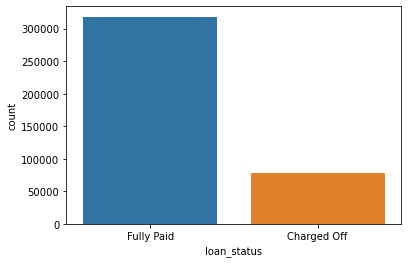

In [11]:
sns.countplot(x='loan_status', data=df)

As can be seen from the chart above, the data is heavily skewed towards Fully Paid, therefore, hypothesisly, the machine learning will have a hard time predicting the Charged Off customers  

#### Loan Amount Histogram

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

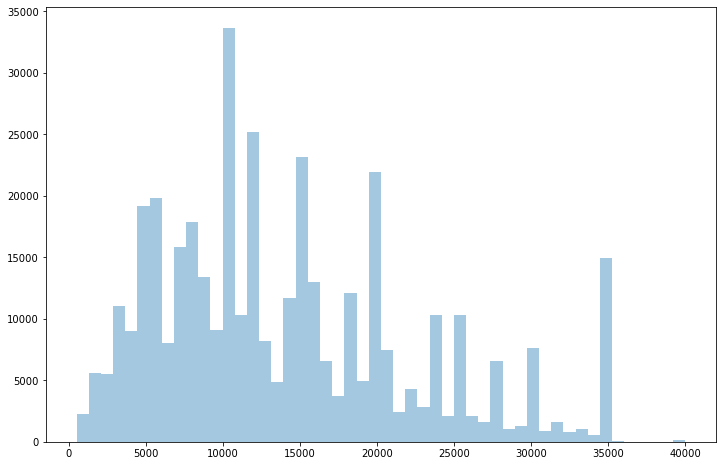

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(x=df['loan_amnt'],bins=50,kde=False)

#### Explore the correlation between numeric features in this Dataset

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

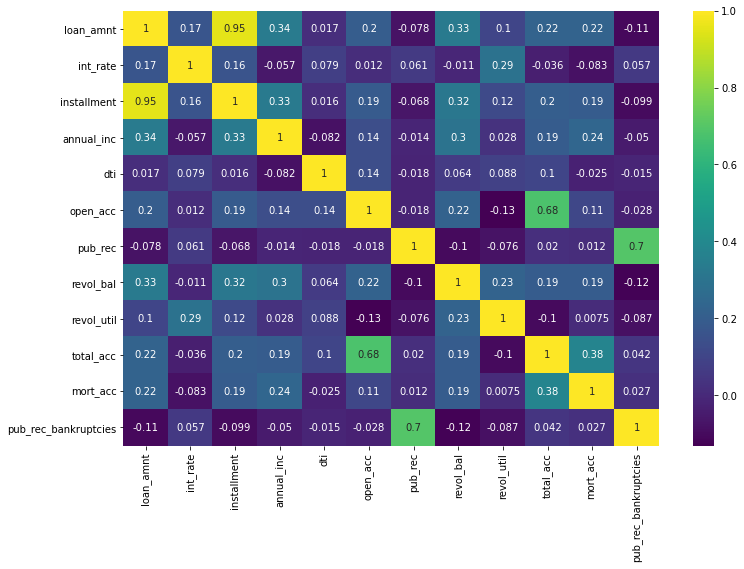

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True,cmap='viridis')

#### Let us Explore the meaning of some high correlation features 

#### Loan amount and installment

In [15]:
feat_info('installment')
print('\n')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

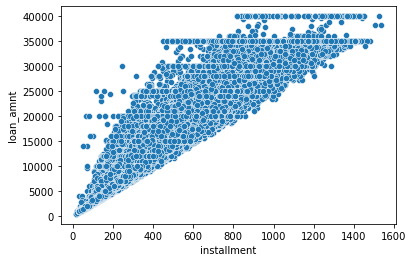

In [16]:
sns.scatterplot(x='installment',y='loan_amnt',data = df)

This make perfect sense in this situation since customers who borrow more money must pay  higher monthy rate for the lenders

Other features is easy to explain, more public records is not a good sign for a business, and  open accounts contributes toward the total accounts of the customer.

#### Relationship Between Loan Amount and Loan Status

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

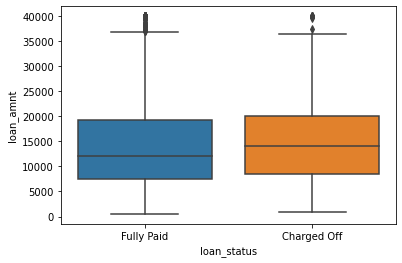

In [17]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The mean loan amount of Charged Off is slightly higher than Fully Paid, which is make sense because customers will faced difficulties in repaying large loan

#### Exploring the Grade and Subgrade columns that LendingClub attributes 

In [19]:
sorted(df.grade.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df.sub_grade.unique().transpose())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Text(0.5, 1.0, 'Count plot per Grade by Loan Status')

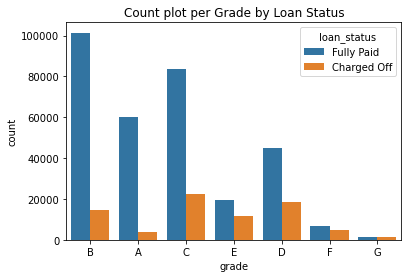

In [21]:
sns.countplot(x='grade',hue='loan_status',data=df)
plt.title('Count plot per Grade by Loan Status')

Text(0.5, 1.0, 'Count plot per SubGrade by Loan Status')

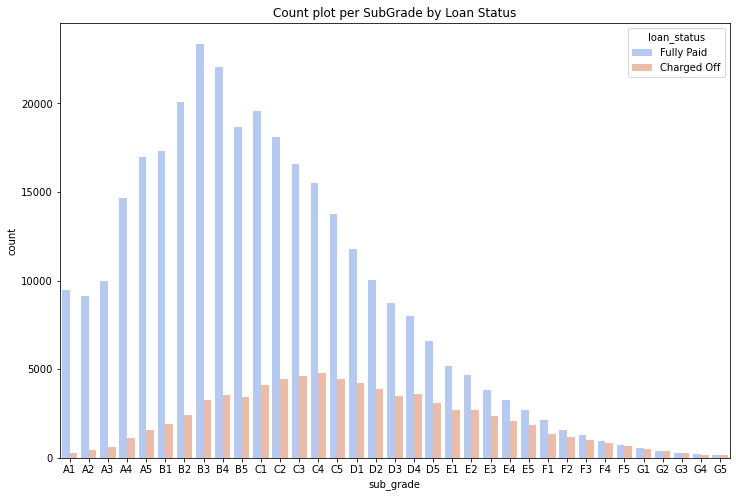

In [22]:
plt.figure(figsize=(12,8))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df,order=sub_grade_order,palette='coolwarm',hue ='loan_status')
plt.title('Count plot per SubGrade by Loan Status')

It looks like that customer from grade F and G have a higher charged off rate, we can dig futher into it

Text(0.5, 1.0, 'Count plot In SubGrade F and G by Loan Status ')

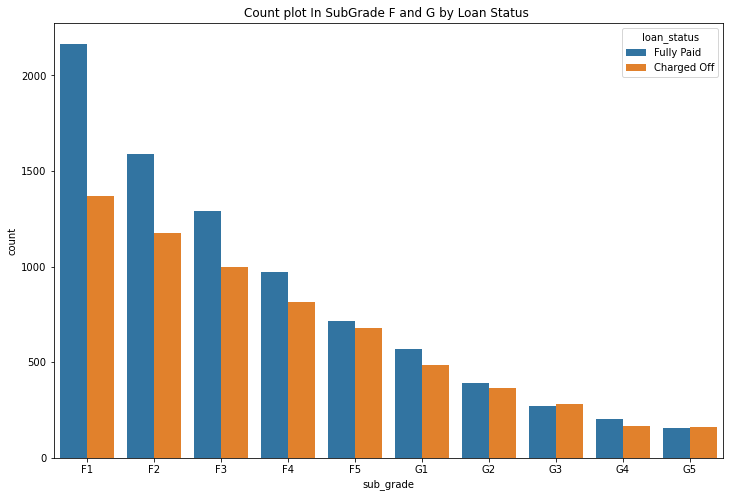

In [23]:
data_grade_FG = df[(df['grade']=='F') | (df['grade']=='G')]
sub_grade_sorted = sorted(data_grade_FG['sub_grade'].unique())

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade',data = data_grade_FG,hue='loan_status',order=sub_grade_sorted)
plt.title('Count plot In SubGrade F and G by Loan Status ')

#### Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

In [24]:
df['loan_repaid'] = [1 if i=='Fully Paid' else 0 for i in df['loan_status']]

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

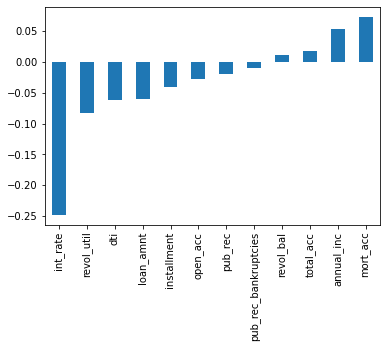

In [26]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

### Data Preprocessing

In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

In [28]:
len(df)

396030

In [29]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

There are a lot of missing data in emp title and emp length, so we need to explore these features further

In [30]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [31]:
df['emp_title'].nunique()

173105

In [32]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
us postal servis                          1
Vice President commercial banking         1
The Container Store                       1
OB nurse                                  1
City of Hopewell Schools                  1
Name: emp_title, Length: 173105, dtype: int64

There are too many different jobs to create dummy for this feature, we can consider drop this feature

In [33]:
df.drop('emp_title',axis=1,inplace=True)

In [34]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


#### Let's explore emp length

In [35]:
emp_length_orders =['< 1 year',
                     '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

Text(0.5, 1.0, 'Number of loans based on Employment Lenght')

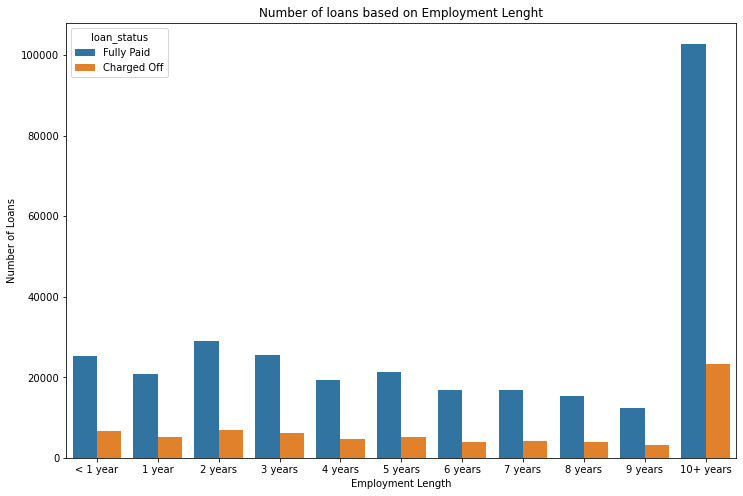

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',data=df,order=emp_length_orders,hue='loan_status')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.title('Number of loans based on Employment Lenght')

This plot still does not show us the relationship between Employment length and Loan Status, so we need to perform further correlation analysis

In [37]:
emp_CO = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [38]:
emp_FP = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [39]:
emp_len = emp_CO/(emp_FP + emp_CO)

<AxesSubplot:xlabel='emp_length'>

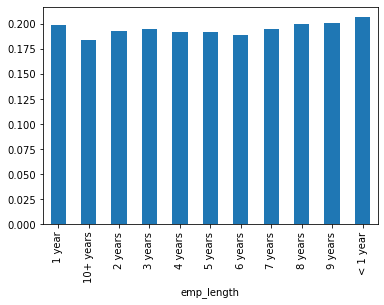

In [40]:
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths, so we can drop this feature since it is not helpful to determine whether customer will fully paid or charged off

In [41]:
df.drop('emp_length',axis=1,inplace=True)

#### Revisit the DataFrame to see what feature columns still have missing data.

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Review the title column vs the purpose column to determine if they are repeated information

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [44]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

#### The title column is simply a string subcategory/description of the purpose column, therefore we can omit the title column

In [45]:
df.drop('title',axis=1,inplace=True)

### We are going to perform imputation for the mort_acc feature

It has too many missing informations to consider dropna, but it is a vital information to determine whether customer will fully paid or charged off

In [46]:
feat_info('mort_acc')

Number of mortgage accounts.


In [47]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

#### Find the correlation between mort_acc and other features 

In [48]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

It appears that total_acc has the highest correlation with mort_acc, so we can use total_acc to fill up all the mort_account, by group by total_acc and find the mean of mort_acc

In [49]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [50]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

#### Lets revisit the count of null values

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

since the number of missing value remaining is not much, we can dropna

In [53]:
df.dropna(inplace=True)

In [54]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Create Dummy variable for each category features 

In [55]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Term Feature

In [56]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

We can convert term feature to just 36 or 60, we don't need to create dummy variable for this feature

In [57]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [58]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

#### Grade Feature

We already know it is a part of SubGrade Feature, so we can drop it 

In [59]:
df.drop('grade',axis=1,inplace=True)

#### Convert SubGrade Feature to dummy variables

In [60]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first =True)
df = df.drop('sub_grade',axis=1)
df = pd.concat([df,subgrade_dummies],axis=1)

In [61]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [62]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status, purpose 

In [63]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)

In [64]:
df = pd.concat([df,dummies],axis=1)

In [65]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership

In [66]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

we can combine the non and any to other to reduce the number of dummies we need to create

In [67]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address

We are only interested in the zip code from the address to understand the location of the customer 

In [68]:
df.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [69]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [71]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

We can Convert these zip code to dummies variable

In [73]:
zipcode_dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop('zip_code',axis=1)
df = pd.concat([df,zipcode_dummies],axis=1)

In [75]:
df = df.drop('address',axis=1)

#### We must drop issue_d as well because we won't know beforehand the loan would be issued or not, so we drop this to avoid data leakage

In [76]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line

In [77]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

We can extract the year from this time stamp

In [78]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [79]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

#### Since we already created a column call loan repaid which based on loan_status, so now loan status is a duplicate feature

In [81]:
df.drop('loan_status',axis=1, inplace = True)

## Train Test Split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df.drop('loan_repaid',axis=1).values

In [84]:
y = df['loan_repaid'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

We will use MinMaxScaler, the purpose of normalizing data is to improve the accuracy of Machine learning model

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
X_train = scaler.fit_transform(X_train)

In [89]:
X_test = scaler.transform(X_test)

# Creating the Model

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

#### Build the Sequential model to train the data

In [104]:
model = Sequential()

# Input layers
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

#hidden layers 
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(1,activation='sigmoid'))

#compiler
model.compile(loss='binary_crossentropy', optimizer='adam')

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=10)

In [107]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2892 - val_loss: 0.2634
Epoch 2/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2651 - val_loss: 0.2629
Epoch 3/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2631 - val_loss: 0.2630
Epoch 4/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2624 - val_loss: 0.2628
Epoch 5/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2616 - val_loss: 0.2628ET
Epoch 6/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2618 - val_loss: 0.2621- ETA: 4s - ETA: 3s - loss: 0.2 - ETA
Epoch 7/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2612 - val_loss: 0.2624
Epoch 8/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2609 - val_loss: 0.2617
Epoch 9/100
3162/3162 [==============================] - 7s 2ms/step - loss: 0.2608 - val_loss: 0.2622
Epoch 10/100
3162/3162 [==========

# Evaluate Model Performance 

In [95]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

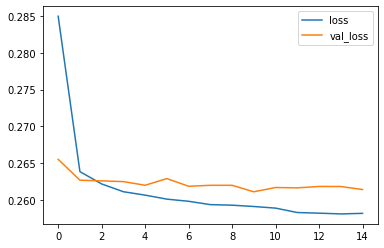

In [96]:
losses.plot()

In [97]:
predictions = model.predict_classes(X_test)

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [98]:
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [100]:
print(confusion_matrix(y_test, predictions))

[[ 6802  8856]
 [   64 63322]]


#### As can be seen from the report, the model is a ble to identfy customer who fully paid back the loan but does not do a good job in predicting customer who charged off

The reason is due to data set heavily skewed toward the fully paid section so the Machine Learning is bias toward predicting more customer who Fully Paid 

#### Test Model Ability:

Given the customer below, would you offer this person a loan?

In [101]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [102]:
model.predict_classes(new_customer.values.reshape(1,78))

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

#### check if they actually paid their loan

In [103]:
df.iloc[random_ind]['loan_repaid']

1.0